Use a stackplot to get proportions of each clone volume in total met volume across animals

In [2]:
#Read in file
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#ignore warnings for seaborn ()
import warnings
#warnings.filterwarnings("ignore")

merged_df = pd.read_csv("./MFP_IV_combined_raw_data.csv")
merged_df.head()

C:\Users\rajasekhar.p\AppData\Local\Temp\ipykernel_25888\5666019.py:9: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv("./MFP_IV_combined_raw_data.csv")


,MET_ID,1,10,11,100,101,110,111,Volume corrected,min_dist,...,id,clone_type,treatment,total_lung_volume,vessel_volume,vessel_surface_area,minor_axis,major_axis,elongation,met_type_cat
0,28.0,0.011735,0.167993,0.0,0.511050,0.000000,0.309223,0.0,2.202260e+08,0.000000,...,1064,1_2_4_6,IV,2.775850e+10,8.529756e+08,1.510170e+08,161.040177,337.000000,2.092645,polyclonal
1,50.0,0.998808,0.001192,0.0,0.000000,0.000000,0.000000,0.0,6.563523e+04,282.432010,...,1064,1_2,IV,2.775850e+10,8.529756e+08,1.510170e+08,13.000000,18.336258,1.410481,polyclonal
2,89.0,0.175399,0.099498,0.0,0.545721,0.179381,0.000000,0.0,1.246517e+08,15.761827,...,1064,1_2_4_5,IV,2.775850e+10,8.529756e+08,1.510170e+08,167.418006,376.000000,2.245876,polyclonal
3,119.0,0.974494,0.001366,0.0,0.024140,0.000000,0.000000,0.0,1.326004e+06,0.000000,...,1064,1_2_4,IV,2.775850e+10,8.529756e+08,1.510170e+08,37.469744,55.000000,1.467851,polyclonal
4,125.0,0.975769,0.000219,0.0,0.024012,0.000000,0.000000,0.0,1.016321e+07,0.000000,...,1064,1_2_4,IV,2.775850e+10,8.529756e+08,1.510170e+08,76.533946,111.000000,1.450337,polyclonal


In [3]:
#groupby treatment and id and sum the volume corrected and change name
total_met_vol = merged_df.groupby(['treatment', 'id'])['Volume corrected'].sum()#.reset_index()
#total_met_vol.rename(columns={'Volume corrected': 'Total_volume'}, inplace=True)
total_met_vol


treatment  id  
IV         883     1.888875e+09
           934     6.176177e+08
           935     2.479900e+09
           1064    2.652949e+09
           1066    4.116722e+09
MFP        1067    4.298675e+08
           1069    8.625258e+08
           1070    8.685609e+09
           1381    2.040186e+08
Name: Volume corrected, dtype: float64

Get the volume proportion of each clone by multiply proportion to the volume of the MET

In [12]:
#multiply columns '1','10','11','100','101','110','111' with Volume corrected column and create a new dataframe 
# that holds the values with title proportions for each column
proportion_df = merged_df[['treatment','id','1','10','11','100','101','110','111','Volume corrected']].copy()
proportion_df['1'] = proportion_df['1']*proportion_df['Volume corrected']
proportion_df['10'] = proportion_df['10']*proportion_df['Volume corrected']
proportion_df['11'] = proportion_df['11']*proportion_df['Volume corrected']
proportion_df['100'] = proportion_df['100']*proportion_df['Volume corrected']
proportion_df['101'] = proportion_df['101']*proportion_df['Volume corrected']
proportion_df['110'] = proportion_df['110']*proportion_df['Volume corrected']
proportion_df['111'] = proportion_df['111']*proportion_df['Volume corrected']

proportion_df

,treatment,id,1,10,11,100,101,110,111,Volume corrected
0,IV,1064,2.584260e+06,3.699636e+07,0.0,1.125464e+08,0.000000e+00,6.809893e+07,0.0,2.202260e+08
1,IV,1064,6.555699e+04,7.823030e+01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,6.563523e+04
2,IV,1064,2.186377e+07,1.240265e+07,0.0,6.802511e+07,2.236017e+07,0.000000e+00,0.0,1.246517e+08
3,IV,1064,1.292183e+06,1.811104e+03,0.0,3.200929e+04,0.000000e+00,0.000000e+00,0.0,1.326004e+06
4,IV,1064,9.916943e+06,2.229565e+03,0.0,2.440394e+05,0.000000e+00,0.000000e+00,0.0,1.016321e+07
...,...,...,...,...,...,...,...,...,...,...
21147,IV,935,3.127293e+04,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,3.127293e+04
21148,IV,935,1.571455e+05,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.571455e+05
21149,IV,935,3.712929e+04,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,3.712929e+04
21150,IV,935,5.817312e+04,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,5.817312e+04


In [ ]:
#sanity check to ensure the sum of the columns is equal to the total volume corrected
combined_vol = proportion_df['1']+proportion_df['10']+proportion_df['11']+proportion_df['100']+proportion_df['101']+proportion_df['110']+proportion_df['111']
orig_vol = proportion_df['Volume corrected']
#ensure each row in the combined_vol is equal to the original volume by tolerance of 1% (sanity_check-orig_vol)/orig_vol
tolerance = 0.01
assert (abs(combined_vol-orig_vol)/orig_vol).max() < tolerance


Create stacked barplot for clone proportion for each mouse lung

In [19]:
stacked = proportion_df.groupby(['treatment','id'])[['1','10','11','100','101','110','111','Volume corrected']].sum().reset_index()

#divide by Volume corrected column
stacked['1'] = stacked['1']/stacked['Volume corrected']
stacked['10'] = stacked['10']/stacked['Volume corrected']
stacked['11'] = stacked['11']/stacked['Volume corrected']
stacked['100'] = stacked['100']/stacked['Volume corrected']
stacked['101'] = stacked['101']/stacked['Volume corrected']
stacked['110'] = stacked['110']/stacked['Volume corrected']
stacked['111'] = stacked['111']/stacked['Volume corrected']
#drop Volume corrected column
stacked.drop(columns=['Volume corrected'],inplace=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 1000x800 with 0 Axes>

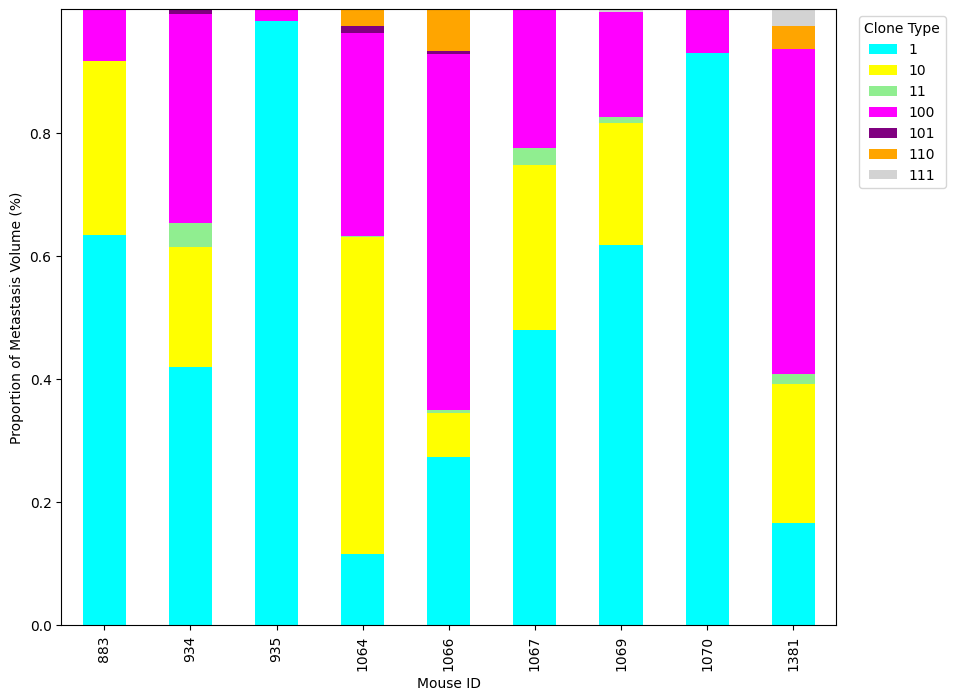

In [21]:
import os 

fig = plt.figure(figsize=(10,8))
# colourmap so in stacked plots, the columns will have this colour 1: Cyan, 10: Yellow, 11: Green, 100: Magenta, 101: Purple, 110: Orange, 111: White
color_map = ['cyan','yellow','lightgreen','magenta','purple','orange','lightgrey']

stacked.set_index('id').plot(kind='bar', stacked=True, figsize=(10,8), color=color_map)

#stacked.set_index('id').plot(kind='bar', stacked=True, figsize=(20,10),cmap = )
#legend on top right outside the plot
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), title='Clone Type')
plt.ylabel("Proportion of Metastasis Volume (%)")
plt.xlabel("Mouse ID")
plt.savefig("./final_graphs/fig3/fig3D_stacked_plot.eps", format="eps",dpi=300)

In [23]:
stacked.to_csv("./final_graphs/fig3/fig3D_stacked_plot_data.csv", index=False)

MONO VS POLYCLONAL

In [24]:
#Calculate whole MET VOLUMES 
orig_groupby = merged_df.groupby(['treatment', 'id'])[['Volume corrected','1','10','11','100','101','110','111']].sum()
orig_groupby = orig_groupby.reset_index()
orig_groupby["Volume corrected"]

0    1.888875e+09
1    6.176177e+08
2    2.479900e+09
3    2.652949e+09
4    4.116722e+09
5    4.298675e+08
6    8.625258e+08
7    8.685609e+09
8    2.040186e+08
Name: Volume corrected, dtype: float64

C:\Users\rajasekhar.p\AppData\Local\Temp\ipykernel_25888\580340570.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.swarmplot(x='clone_type', y='Proportion of Metastasis Volume (%)', hue='treatment', data=stacked_melt, dodge=True, color='black',legend=False)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


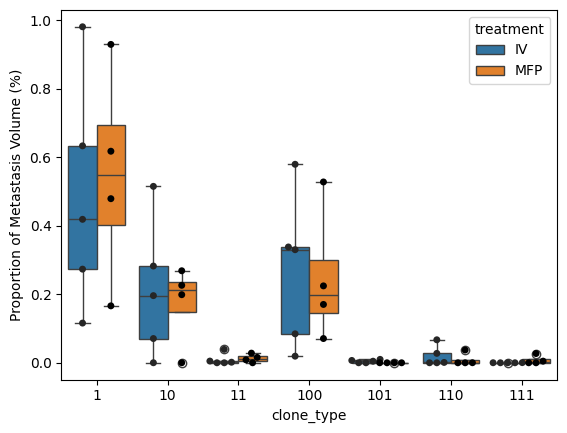

In [29]:
stacked_melt = pd.melt(stacked, id_vars=['treatment','id'], value_vars=['1','10','11','100','101','110','111'], var_name='clone_type', value_name='Proportion of Metastasis Volume (%)')
sns.boxplot(x='clone_type', y='Proportion of Metastasis Volume (%)', hue='treatment', data=stacked_melt)
#swarmplot with dodge
sns.swarmplot(x='clone_type', y='Proportion of Metastasis Volume (%)', hue='treatment', data=stacked_melt, dodge=True, color='black',legend=False)
plt.savefig("./final_graphs/supplementary/supp5A_iv_mfp_met_vol_proportion.eps", format="eps",dpi=300)

Generate proportions for monoclonal and polyclonal (NOT INCLUDED IN PAPER)

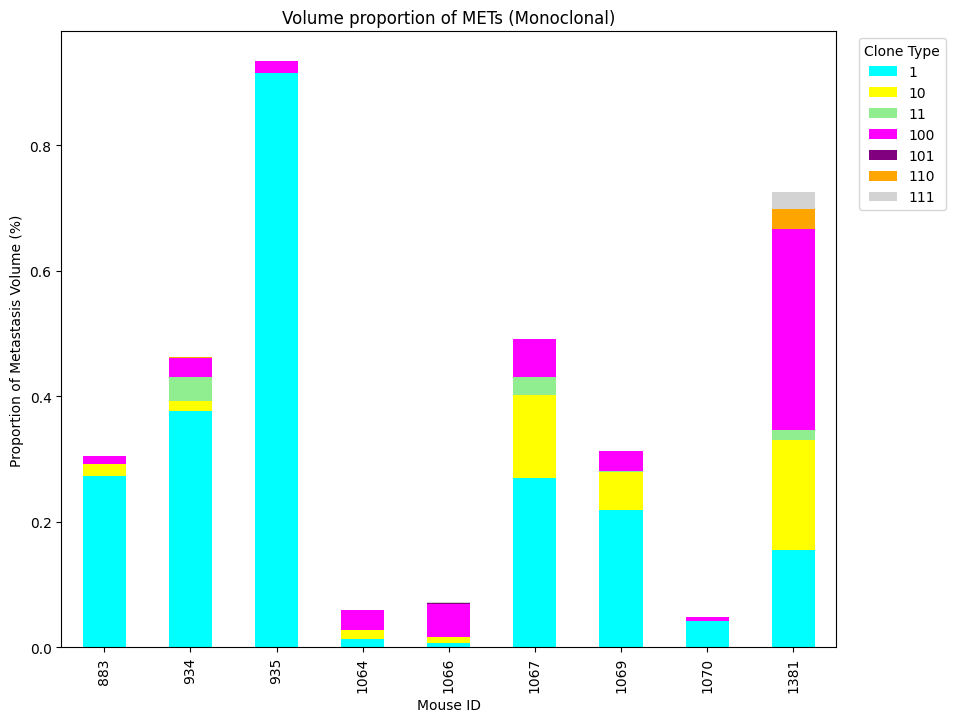

In [26]:
met_cat_type = 'monoclonal'
merged_df_filt = merged_df[(merged_df['met_type_cat'] == met_cat_type)]

#multiply columns '1','10','11','100','101','110','111' with Volume corrected column and create a new dataframe that holds thee values with title proportions for each column
proportion_df = merged_df_filt[['treatment','id','1','10','11','100','101','110','111','Volume corrected']].copy()
proportion_df['1'] = proportion_df['1']*proportion_df['Volume corrected']
proportion_df['10'] = proportion_df['10']*proportion_df['Volume corrected']
proportion_df['11'] = proportion_df['11']*proportion_df['Volume corrected']
proportion_df['100'] = proportion_df['100']*proportion_df['Volume corrected']
proportion_df['101'] = proportion_df['101']*proportion_df['Volume corrected']
proportion_df['110'] = proportion_df['110']*proportion_df['Volume corrected']
proportion_df['111'] = proportion_df['111']*proportion_df['Volume corrected']

#add columns 1, 10, 11, 100, 101, 110 columnwise and add it as a new column 
proportion_df['sanity_check_total_volume'] = proportion_df['1']+proportion_df['10']+proportion_df['11']+proportion_df['100']+proportion_df['101']+proportion_df['110']+proportion_df['111']

stacked_monoclonal = proportion_df.groupby(['treatment','id'])[['1','10','11','100','101','110','111','Volume corrected']].sum().reset_index()

#divide by Volume corrected column
stacked_monoclonal['1'] = stacked_monoclonal['1']/orig_groupby['Volume corrected']
stacked_monoclonal['10'] = stacked_monoclonal['10']/orig_groupby['Volume corrected']
stacked_monoclonal['11'] = stacked_monoclonal['11']/orig_groupby['Volume corrected']
stacked_monoclonal['100'] = stacked_monoclonal['100']/orig_groupby['Volume corrected']
stacked_monoclonal['101'] = stacked_monoclonal['101']/orig_groupby['Volume corrected']
stacked_monoclonal['110'] = stacked_monoclonal['110']/orig_groupby['Volume corrected']
stacked_monoclonal['111'] = stacked_monoclonal['111']/orig_groupby['Volume corrected']
#drop Volume corrected column
stacked_monoclonal.drop(columns=['Volume corrected'],inplace=True)
color_map = ['cyan','yellow','lightgreen','magenta','purple','orange','lightgrey']

stacked_monoclonal.set_index('id').plot(kind='bar', stacked=True, figsize=(10,8), color=color_map)
plt.title("Volume proportion of METs (Monoclonal)")
plt.ylabel("Proportion of Metastasis Volume (%)")
plt.xlabel("Mouse ID")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), title='Clone Type')



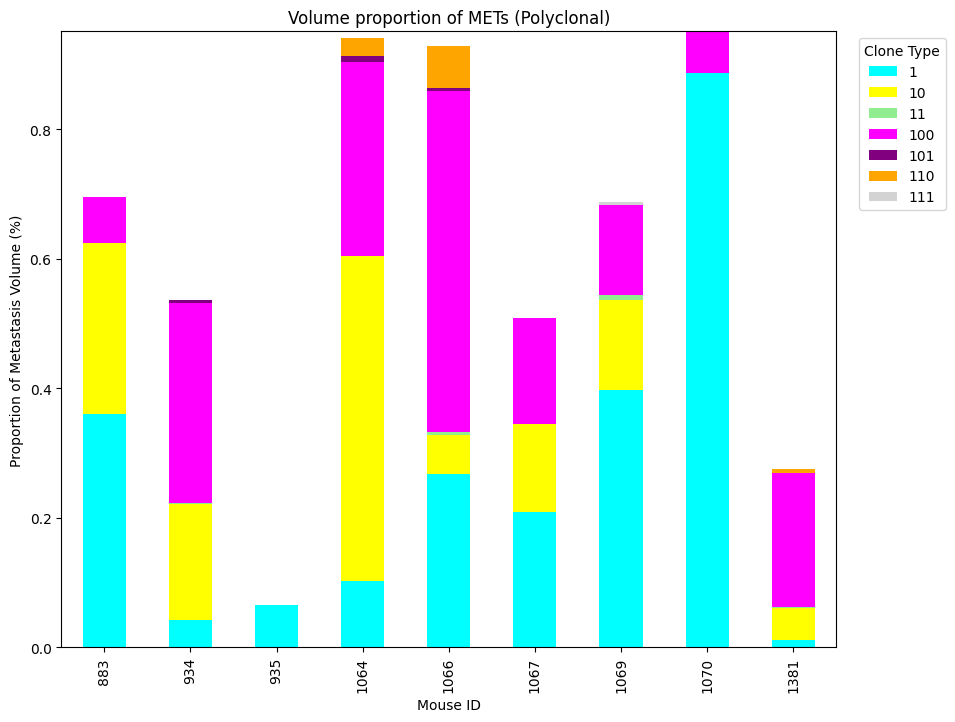

In [27]:
met_cat_type = 'polyclonal'
merged_df_filt = merged_df[(merged_df['met_type_cat'] == met_cat_type)]

proportion_df = merged_df_filt.groupby(['treatment', 'id'])[['Volume corrected','1','10','11','100','101','110','111']].sum()

#multiply columns '1','10','11','100','101','110','111' with Volume corrected column and create a new dataframe that holds thee values with title proportions for each column
proportion_df = merged_df_filt[['treatment','id','1','10','11','100','101','110','111','Volume corrected']].copy()
proportion_df['1'] = proportion_df['1']*proportion_df['Volume corrected']
proportion_df['10'] = proportion_df['10']*proportion_df['Volume corrected']
proportion_df['11'] = proportion_df['11']*proportion_df['Volume corrected']
proportion_df['100'] = proportion_df['100']*proportion_df['Volume corrected']
proportion_df['101'] = proportion_df['101']*proportion_df['Volume corrected']
proportion_df['110'] = proportion_df['110']*proportion_df['Volume corrected']
proportion_df['111'] = proportion_df['111']*proportion_df['Volume corrected']

#add columns 1, 10, 11, 100, 101, 110 columnwise and add it as a new column 
proportion_df['sanity_check_total_volume'] = proportion_df['1']+proportion_df['10']+proportion_df['11']+proportion_df['100']+proportion_df['101']+proportion_df['110']+proportion_df['111']

stacked_polyclonal = proportion_df.groupby(['treatment','id'])[['1','10','11','100','101','110','111','Volume corrected']].sum().reset_index()

#divide by Volume corrected column
stacked_polyclonal['1'] = stacked_polyclonal['1']/orig_groupby['Volume corrected']
stacked_polyclonal['10'] = stacked_polyclonal['10']/orig_groupby['Volume corrected']
stacked_polyclonal['11'] = stacked_polyclonal['11']/orig_groupby['Volume corrected']
stacked_polyclonal['100'] = stacked_polyclonal['100']/orig_groupby['Volume corrected']
stacked_polyclonal['101'] = stacked_polyclonal['101']/orig_groupby['Volume corrected']
stacked_polyclonal['110'] = stacked_polyclonal['110']/orig_groupby['Volume corrected']
stacked_polyclonal['111'] = stacked_polyclonal['111']/orig_groupby['Volume corrected']
#drop Volume corrected column
stacked_polyclonal.drop(columns=['Volume corrected'],inplace=True)
color_map = ['cyan','yellow','lightgreen','magenta','purple','orange','lightgrey']
stacked_polyclonal.set_index('id').plot(kind='bar', stacked=True, figsize=(10,8), color=color_map)
plt.title("Volume proportion of METs (Polyclonal)")
plt.ylabel("Proportion of Metastasis Volume (%)")
plt.xlabel("Mouse ID")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), title='Clone Type')

In [23]:
stacked

,treatment,id,1,10,11,100,101,110,111
0,IV,883,0.633069,0.282334,0.000013,0.084484,2.718362e-05,5.508582e-05,1.808375e-05
1,IV,934,0.418651,0.195959,0.039115,0.337949,6.826809e-03,1.037665e-03,4.608333e-04
2,IV,935,0.980549,0.000131,0.000024,0.019296,4.253626e-07,0.000000e+00,0.000000e+00
3,IV,1064,0.115875,0.514847,0.001666,0.329984,9.965377e-03,2.749026e-02,1.720463e-04
4,IV,1066,0.273279,0.070757,0.004980,0.579275,4.579392e-03,6.708268e-02,4.621548e-05
5,MFP,1067,0.478961,0.268497,0.028149,0.224393,0.000000e+00,0.000000e+00,0.000000e+00
6,MFP,1069,0.614376,0.198261,0.008582,0.173802,3.804359e-05,1.830587e-04,4.758295e-03
7,MFP,1070,0.928679,0.000105,0.000044,0.071172,2.334592e-07,1.302047e-07,5.390418e-08
8,MFP,1381,0.166175,0.226050,0.015760,0.527689,5.367119e-06,3.730915e-02,2.701106e-02


Testing if there is difference in clone proportions across treatments

In [ ]:
from scipy.stats import ttest_ind
clone_columns = ['1','10','11','100','101','110','111']


for col in clone_columns:
    iv_clone = stacked[stacked['treatment']=='IV'][col]
    mfp_clone = stacked[stacked['treatment']=='MFP'][col]
    ttest = ttest_ind(iv_clone,mfp_clone)
    print(f"Clone {col} IV vs MFP independent ttest : {ttest}\n")


Clone 1 IV vs MFP independent ttest : TtestResult(statistic=-0.28529562557934285, pvalue=0.7836745228367111, df=7.0)

Clone 10 IV vs MFP independent ttest : TtestResult(statistic=0.34541534084560377, pvalue=0.7399295461067672, df=7.0)

Clone 11 IV vs MFP independent ttest : TtestResult(statistic=-0.3965112936037076, pvalue=0.7035376382714557, df=7.0)

Clone 100 IV vs MFP independent ttest : TtestResult(statistic=0.1467149506683247, pvalue=0.8874930442608289, df=7.0)

Clone 101 IV vs MFP independent ttest : TtestResult(statistic=1.940257417504114, pvalue=0.09349955806517309, df=7.0)

Clone 110 IV vs MFP independent ttest : TtestResult(statistic=0.5759475784450625, pvalue=0.5826852939544761, df=7.0)

Clone 111 IV vs MFP independent ttest : TtestResult(statistic=-1.376219645137825, pvalue=0.21116427519640554, df=7.0)



Plot proportions for monoclonal vs polyclonal for each CLONE

C:\Users\rajasekhar.p\AppData\Local\Temp\ipykernel_25888\911140737.py:12: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.swarmplot(x='treatment', y=col, hue='met_type_cat', data=stacked_merged, dodge=True, color='black',legend=False,hue_order=['monoclonal','polyclonal'])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
C:\Users\rajasekhar.p\AppData\Local\Temp\ipykernel_25888\911140737.py:12: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.swarmplot(x='treatment', y=col, hue='met_type_cat', data=stacked_merged, dodge=True, color='black',legend=False,hue_order=['monoclonal','polyclonal'])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
C:\Users\rajasek

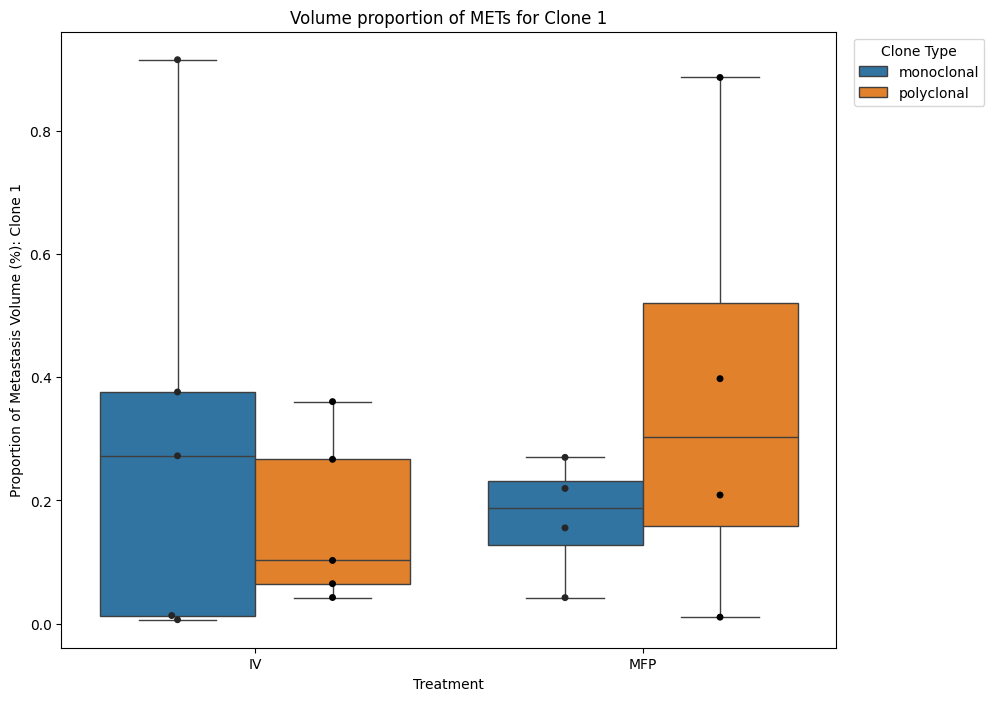

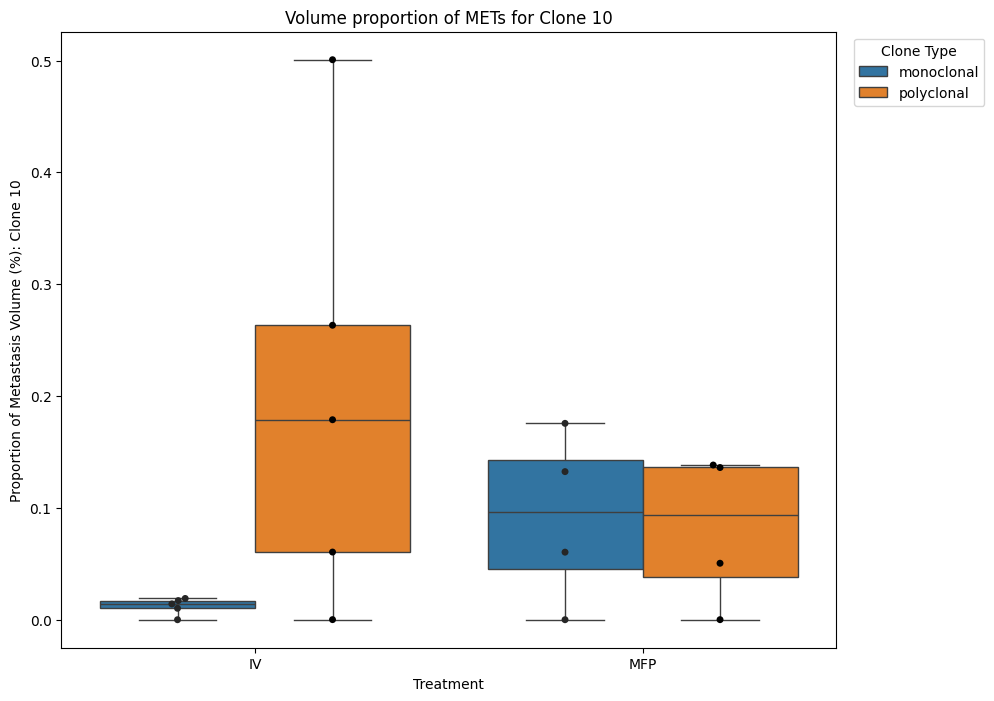

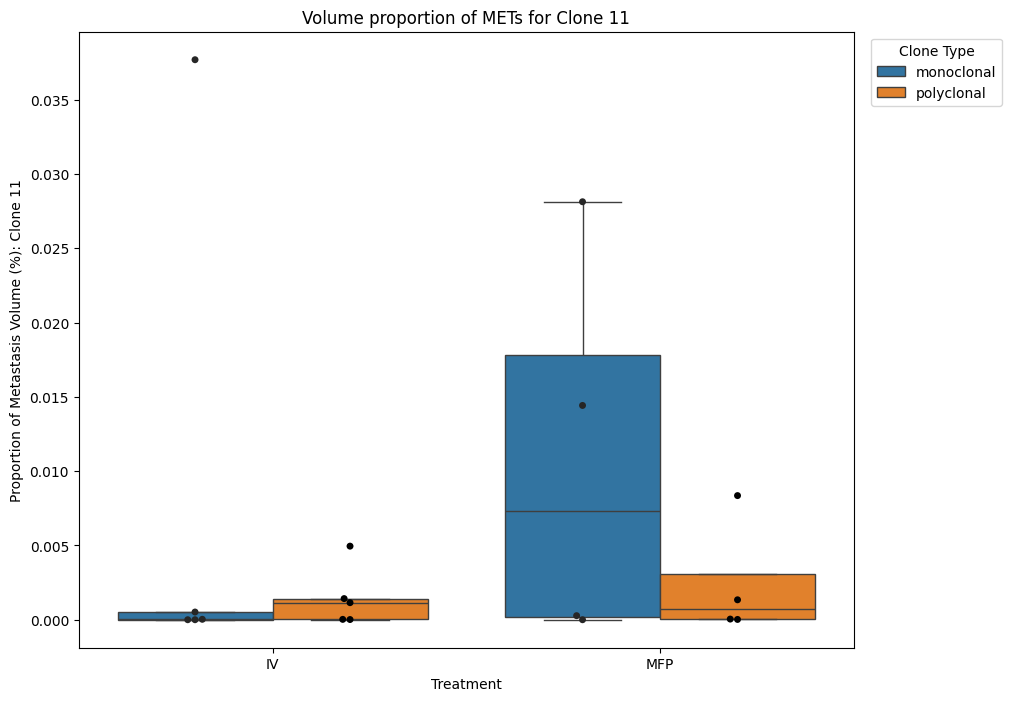

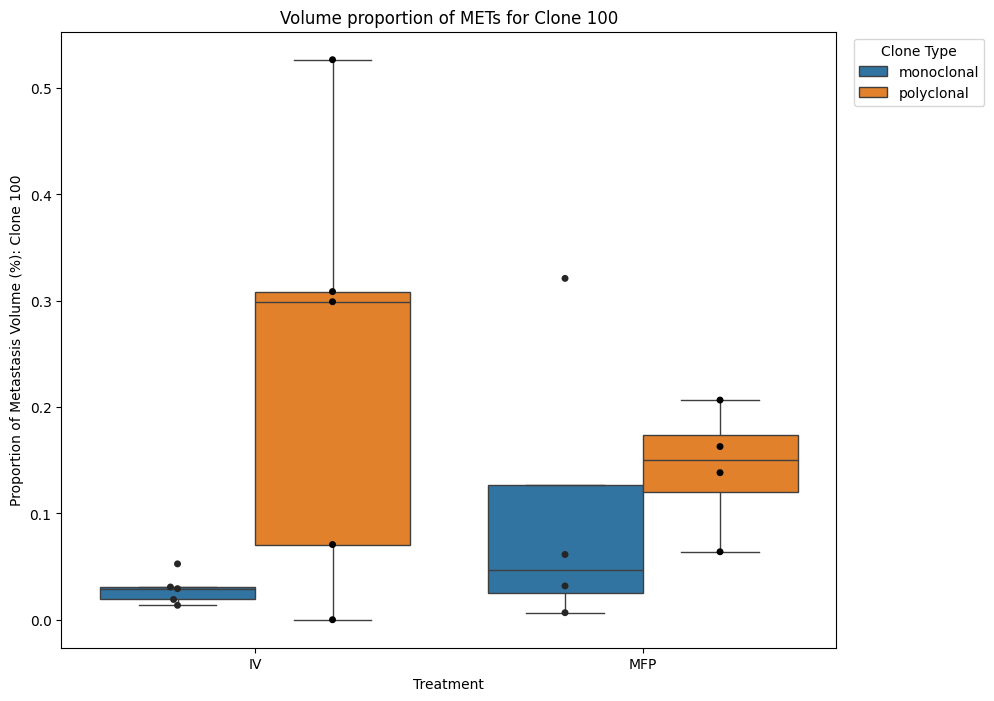

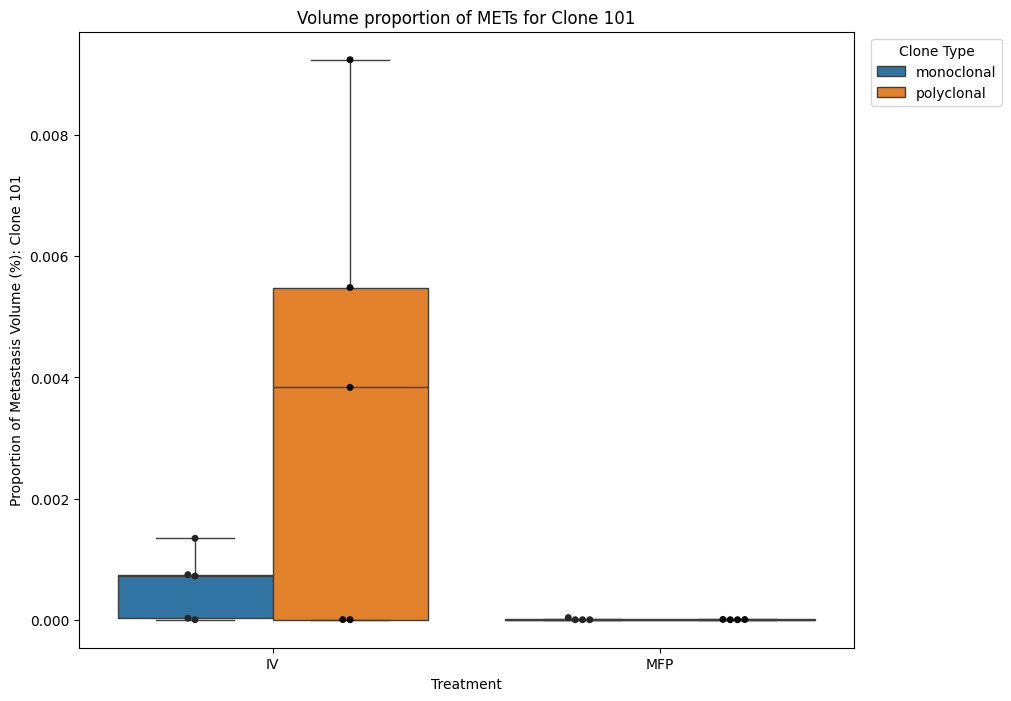

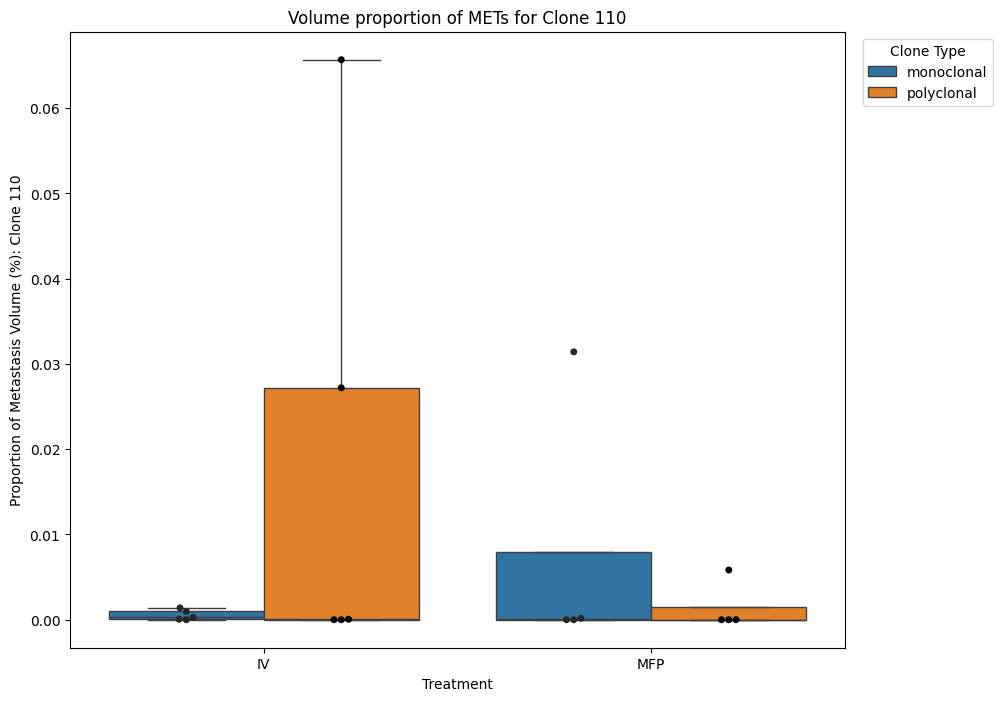

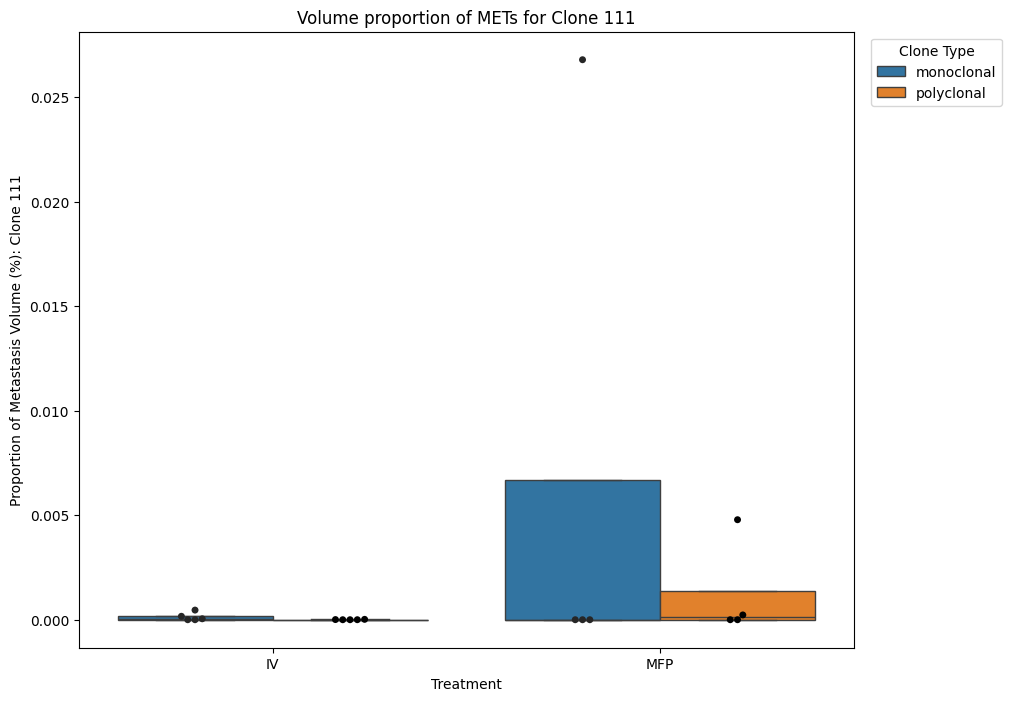

In [30]:
#merge stacked_monoclonal and stacked_polyclonal so that we can plot them together
stacked_polyclonal['met_type_cat'] = 'polyclonal'
stacked_monoclonal['met_type_cat'] = 'monoclonal'
stacked_merged = pd.concat([stacked_polyclonal,stacked_monoclonal])
#sns.violinplot(x='treatment', y='1', hue='met_type_cat', data=stacked_merged,inner='point')
clone_columns = ['1','10','11','100','101','110','111']
color_map = ['cyan','yellow','lightgreen','magenta','purple','orange','lightgrey']

for col in clone_columns:
    fig = plt.figure(figsize=(10,8))
    sns.boxplot(x='treatment', y=col, hue='met_type_cat', data=stacked_merged,hue_order=['monoclonal','polyclonal'],showfliers=False)#,inner='point')
    sns.swarmplot(x='treatment', y=col, hue='met_type_cat', data=stacked_merged, dodge=True, color='black',legend=False,hue_order=['monoclonal','polyclonal'])
    plt.title("Volume proportion of METs for Clone "+col)
    plt.ylabel("Proportion of Metastasis Volume (%): Clone "+col)
    plt.xlabel("Treatment")
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), title='Clone Type')
    plt.savefig(f"./final_graphs/supplementary/supp5_mono_poly_clone_{col}.eps", format="eps",dpi=300)


In [31]:
#run ttest for monoclonal vs polyclonal for each treatment for clone 1

from scipy.stats import ttest_ind,ttest_rel


for col in clone_columns:
    iv_monoclonal_clone = stacked_monoclonal[stacked_monoclonal['treatment']=='IV'][col]
    iv_polyclonal_clone = stacked_polyclonal[stacked_polyclonal['treatment']=='IV'][col]
    mfp_monoclonal_clone = stacked_monoclonal[stacked_monoclonal['treatment']=='MFP'][col]
    mfp_polyclonal_clone = stacked_polyclonal[stacked_polyclonal['treatment']=='MFP'][col]

    ttest_iv = ttest_rel(iv_monoclonal_clone,iv_polyclonal_clone)
    ttest_mfp = ttest_rel(mfp_monoclonal_clone,mfp_polyclonal_clone)
    print(f"Clone {col} IV (mono vs poly) paired ttest : {ttest_iv}")
    print(f"Clone {col} MFP (mono vs poly) paired ttest: {ttest_mfp} \n")

    ttest_mono_iv_mfp = ttest_ind(iv_monoclonal_clone,mfp_monoclonal_clone)
    ttest_poly_iv_mfp = ttest_ind(iv_polyclonal_clone,mfp_polyclonal_clone)

    print(f"Clone {col} IV vs MFP (monoclonal) independent ttest : {ttest_mono_iv_mfp}")
    print(f"Clone {col} IV vs MFP (polyclonal) independent ttest : {ttest_poly_iv_mfp} \n")


Clone 1 IV (mono vs poly) paired ttest : TtestResult(statistic=0.7431540116068351, pvalue=0.4986650442901249, df=4)
Clone 1 MFP (mono vs poly) paired ttest: TtestResult(statistic=-0.9107006896478499, pvalue=0.4295986485430275, df=3) 

Clone 1 IV vs MFP (monoclonal) independent ttest : TtestResult(statistic=0.749541173123, pvalue=0.477959291753004, df=7.0)
Clone 1 IV vs MFP (polyclonal) independent ttest : TtestResult(statistic=-1.162701368787206, pvalue=0.28305154640635377, df=7.0) 

Clone 10 IV (mono vs poly) paired ttest : TtestResult(statistic=-2.1976068101816755, pvalue=0.09290024391098667, df=4)
Clone 10 MFP (mono vs poly) paired ttest: TtestResult(statistic=0.2583111200497233, pvalue=0.812874531952052, df=3) 

Clone 10 IV vs MFP (monoclonal) independent ttest : TtestResult(statistic=-2.3322959079591734, pvalue=0.05243633898484912, df=7.0)
Clone 10 IV vs MFP (polyclonal) independent ttest : TtestResult(statistic=1.1490413000712647, pvalue=0.2882813962850949, df=7.0) 

Clone 11 IV 